In [ ]:
# Packages and adjustments to the figures
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Generate a signal
samplingFreq = 1000; # sampled at 1 kHz = 1000 samples / second
tlims = [0,1]        # in seconds
signalFreq = [2,50]; # Cycles / second
signalMag = [1,0.2]; # magnitude of each sine
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)
y = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t) + signalMag[1]*np.sin(2*math.pi*signalFreq[1]*t)

# Compute the Fourier transform
yhat = np.fft.fft(y);
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq); # the frequencies in cycles/s

# Plot the signal
plt.figure()
plt.plot(t,y);
plt.ylabel("$y(t)$");
plt.xlabel("$t$ (s)");
plt.xlim([min(t),max(t)]);

# Plot the power spectrum
plt.figure()
plt.plot(fcycles,np.absolute(yhat));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");

In [ ]:
# Butterworth filter
wc = 2*np.pi*5; # cutoff frequency (rad/s)
n = 2; # Filter order

# Compute the Butterworth filter coefficents
a = np.zeros(n+1);
gamma = np.pi/(2.0*n);
a[0] = 1; # first coef is always 1
for k in range(0,n):
    rfac = np.cos(k*gamma)/np.sin((k+1)*gamma);
    a[k+1] = rfac*a[k]; # Other coefficients by recursion

print("Butterworth polynomial coefficients a_i:                " + str(a))

# Adjust the cutoff frequency
c = np.zeros(n+1);
for k in range(0,n+1):
    c[n-k] = a[k]/pow(wc,k)

print("Butterworth coefficients with frequency adjustment c_i: " + str(c))

In [ ]:
# Low-pass filter
w0 = 2*np.pi*5; # pole frequency (rad/s)
num = [1];      # transfer function numerator coefficients
den = c;        # transfer function denominator coefficients
lowPass = signal.TransferFunction(num,den) # Transfer function

# Generate the bode plot
w = np.logspace( np.log10(min(signalFreq)*2*np.pi/10), np.log10(max(signalFreq)*2*np.pi*10), 500 )
w, mag, phase = signal.bode(lowPass,w)

# Magnitude plot
plt.figure()
plt.semilogx(w, mag)
for sf in signalFreq:
    plt.semilogx([sf*2*np.pi,sf*2*np.pi],[min(mag),max(mag)],'k:')
plt.ylabel("Magnitude ($dB$)")
plt.xlim([min(w),max(w)])
plt.ylim([min(mag),max(mag)])

# Phase plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.ylabel("Phase ($^\circ$)")
plt.xlabel("$\omega$ (rad/s)")
plt.xlim([min(w),max(w)])
plt.show()

In [ ]:
# Compute the discrete low pass with delta_t = 1/samplingFrequency
dt = 1.0/samplingFreq;
discreteLowPass = lowPass.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteLowPass)

In [ ]:
# The coefficients from the discrete form of the filter transfer function (but with a negative sign)
b = discreteLowPass.num;
a = -discreteLowPass.den;
print("Filter coefficients b_i: " + str(b))
print("Filter coefficients a_i: " + str(a[1:]))

# Filter the signal
Nb = len(b)
yfilt = np.zeros(len(y));
for m in range(3,len(y)):
    yfilt[m] = b[0]*y[m];
    for i in range(1,Nb):
        yfilt[m] += a[i]*yfilt[m-i] + b[i]*y[m-i];
    
# View the result
# Plot the signal
plt.figure()
plt.plot(t,y);
plt.plot(t,yfilt);
plt.ylabel("$y(t)$")
plt.xlim([min(t),max(t)]);

# Generate Fourier transform
yfilthat = np.fft.fft(yfilt)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

plt.figure()
plt.plot(fcycles,np.absolute(yhat));
plt.plot(fcycles,np.absolute(yfilthat));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");

In [12]:
import numpy as np
import pandas as pd

# Read data from CSV file into a pandas dataframe
df = pd.read_csv('C:/Users/Asus/OneDrive/Documents/Inventor/MetaSensingLight/Testdata/Test3_cal_10.3.csv')

# Extract values from dataframe
x_values = df['l00'].values

# Initialize arrays
x = np.zeros(3)
y = np.zeros(3)

for k in range(1000):
    # Test signal
    t = k/1000.0
    x[0] = x_values[k]  # Replace x[0] with value from CSV file

    # Compute the filtered signal (second order Butterworth example)
    b = np.array([0.00024132, 0.00048264, 0.00024132])
    a = np.array([1.95558189, -0.95654717])
    y[0] = a[0]*y[1] + a[1]*y[2] + b[0]*x[0] + b[1]*x[1] + b[2]*x[2]

    # Print values
    print(f"raw input: {x[0]}, filtered output: {y[0]}")

    # Update arrays
    for i in range(1,3):
        x[i] = x[i-1] # store xi
        y[i] = y[i-1] # store yi


raw input: 331.0, filtered output: 0.07987692
raw input: 331.0, filtered output: 0.3993074964066624
raw input: 332.0, filtered output: 0.718671052866531
raw input: 332.0, filtered output: 1.03845029407262
raw input: 332.0, filtered output: 1.3579208587727576
raw input: 332.0, filtered output: 1.6770830449262015
raw input: 332.0, filtered output: 1.995937150204595
raw input: 332.0, filtered output: 2.3144834719922454
raw input: 332.0, filtered output: 2.6327223073864006
raw input: 332.0, filtered output: 2.9506539531975267
raw input: 332.0, filtered output: 3.268278705949584
raw input: 332.0, filtered output: 3.585596861880305
raw input: 332.0, filtered output: 3.902608716941469
raw input: 332.0, filtered output: 4.219314566799179
raw input: 332.0, filtered output: 4.535714706834138
raw input: 332.0, filtered output: 4.851809432141925
raw input: 332.0, filtered output: 5.167599037533266
raw input: 332.0, filtered output: 5.4830838175343155
raw input: 332.0, filtered output: 5.7982640663

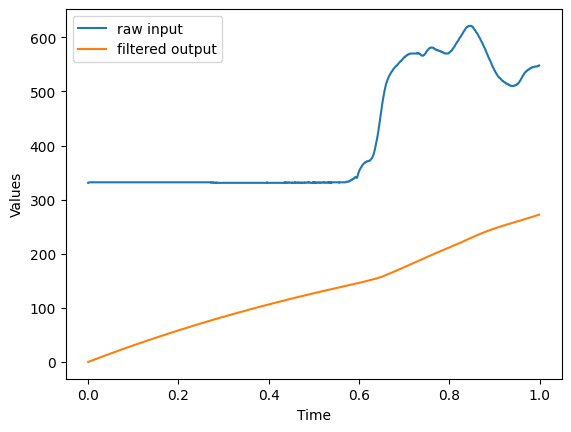

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into a pandas dataframe
df = pd.read_csv('C:/Users/Asus/OneDrive/Documents/Inventor/MetaSensingLight/Testdata/Test3_cal_10.3.csv')

# Extract values from dataframe
x_values = df['l00'].values

# Initialize arrays
x = np.zeros(3)
y = np.zeros(3)

# Initialize lists to store values
x_list = []
y_list = []
t_list = []

for k in range(1000):
    # Test signal
    t = k/1000.0
    x[0] = x_values[k]  # Replace x[0] with value from CSV file

    # Compute the filtered signal (second order Butterworth example)
    b = np.array([0.00024132, 0.00048264, 0.00024132])
    a = np.array([1.95558189, -0.95654717])
    y[0] = a[0]*y[1] + a[1]*y[2] + b[0]*x[0] + b[1]*x[1] + b[2]*x[2]

    # Add values to lists
    x_list.append(x[0])
    y_list.append(y[0])
    t_list.append(t)

    # Update arrays
    for i in range(1,3):
        x[i] = x[i-1] # store xi
        y[i] = y[i-1] # store yi

# Plot x and y values over time
plt.plot(t_list, x_list, label='raw input')
plt.plot(t_list, y_list, label='filtered output')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()
